In [1]:
import GEOparse 
import pandas as pd, numpy as np 
import glob, sys 
from pprint import pprint 
import pandas as pd 
from scipy import stats 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
dataset = './datasets/soft_files/GSE45291_family.soft.gz' 
gse = GEOparse.get_GEO(filepath=dataset, silent=True) 

/Users/nikunjgupta/work/GRN/venv/lib/python3.9/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")


In [3]:
print("GPL example:")
for gpl_name, gpl in gse.gpls.items():
    print("Name: ", gpl_name)
    print("Metadata:",)
    for key, value in gpl.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print("Table data:",)
    print(gpl.table) 
    print(gpl.table.columns)
    break

GPL example:
Name:  GPL13158
Metadata:
 - title : [HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM Array Plate
 - geo_accession : GPL13158
 - status : Public on Feb 11 2011
 - submission_date : Feb 11 2011
 - last_update_date : Apr 20 2018
 - technology : in situ oligonucleotide
 - distribution : commercial
 - organism : Homo sapiens
 - taxid : 9606
 - manufacturer : Affymetrix
 - manufacture_protocol : see manufacturer's web site
 - description : Affymetrix submissions are typically submitted to GEO using the GEOarchive method described at http://www.ncbi.nlm.nih.gov/projects/geo/info/geo_affy.html, , , , Annotations derived from HT_HG-U133_Plus_PM.na31.annot.csv
 - web_link : http://www.affymetrix.com/browse/products.jsp?navMode=34000&productId=131440&navAction=jump&aId=productsNav#1_1, http://www.affymetrix.com/analysis/index.affx
 - contact_name : ,,Affymetrix, Inc.
 - contact_email : geo@ncbi.nlm.nih.gov, support@affymetrix.com
 - contact_phone : 888-362-2447
 - contact_institute : 

In [4]:
print("GSM example:")
count = 0 
df_tag = False 
for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
#     print("Metadata:",)
#     for key, value in gsm.metadata.items():
#         print(" - %s : %s" % (key, ", ".join(value)))
#     print ("Table data:",)
#     print (gsm.table.head())
#     print (len(gsm.table['ID_REF'].unique()))
#     print(gsm.table.columns)
    count+=1 
    if not df_tag: 
        df = gsm.table 
        df_tag = True 
    else: 
        df = pd.merge(df, gsm.table, on='ID_REF') 
    if count==10:
        break 
print(count) 

GSM example:
Name:  GSM1100843
Name:  GSM1100844
Name:  GSM1100845
Name:  GSM1100846
Name:  GSM1100847
Name:  GSM1100848
Name:  GSM1100849
Name:  GSM1100850
Name:  GSM1100851
Name:  GSM1100852
10


/var/folders/_1/dc2yd0kn325bph09grgy33lr0000gn/T/ipykernel_98212/1993327349.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VALUE_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, gsm.table, on='ID_REF')
/var/folders/_1/dc2yd0kn325bph09grgy33lr0000gn/T/ipykernel_98212/1993327349.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VALUE_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, gsm.table, on='ID_REF')
/var/folders/_1/dc2yd0kn325bph09grgy33lr0000gn/T/ipykernel_98212/1993327349.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VALUE_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, gsm.table, on='ID_REF')
/var/folders/_1/dc2yd0kn325bph09grgy33lr0000gn/T/ipykernel_98212/1993327349.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VALUE_x'} i

In [5]:
cols=["Sample "+str(i) for i in range(1, len(list(df.columns)))] 
cols.insert(0, "ID_REF") 
df.columns = cols 
df.head()

,ID_REF,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10
0,1007_PM_s_at,3.537552,3.249034,3.619226,3.632301,3.122761,2.834079,2.940208,2.990906,2.881942,2.815237
1,1053_PM_at,5.463634,5.649695,5.251240,5.293127,5.501780,5.712752,6.270448,6.231601,5.918056,5.725501
2,117_PM_at,9.742706,10.141563,10.007534,9.238588,9.687890,9.909333,9.060148,10.781097,8.955839,9.891850
3,121_PM_at,2.929835,2.917571,3.038868,3.043550,3.225661,2.972903,2.915651,2.916912,2.726514,2.942972
4,1255_PM_g_at,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061


In [6]:
df.shape

(54715, 11)

In [7]:
df.head() 

,ID_REF,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10
0,1007_PM_s_at,3.537552,3.249034,3.619226,3.632301,3.122761,2.834079,2.940208,2.990906,2.881942,2.815237
1,1053_PM_at,5.463634,5.649695,5.251240,5.293127,5.501780,5.712752,6.270448,6.231601,5.918056,5.725501
2,117_PM_at,9.742706,10.141563,10.007534,9.238588,9.687890,9.909333,9.060148,10.781097,8.955839,9.891850
3,121_PM_at,2.929835,2.917571,3.038868,3.043550,3.225661,2.972903,2.915651,2.916912,2.726514,2.942972
4,1255_PM_g_at,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061


In [8]:
df.describe()

,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10
count,54715.000000,54715.000000,54715.000000,54715.000000,54715.000000,54715.000000,54715.000000,54715.000000,54715.000000,54715.000000
mean,4.313170,4.314076,4.324081,4.293159,4.322037,4.335901,4.360390,4.362324,4.362261,4.334827
std,2.449720,2.448957,2.455828,2.425231,2.439799,2.474785,2.488444,2.496473,2.488293,2.472394
min,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061
25%,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061,2.298061
50%,3.171008,3.167708,3.170747,3.171670,3.199819,3.172356,3.188589,3.190720,3.198884,3.165622
75%,5.858852,5.861776,5.891754,5.797083,5.880822,5.925774,6.026806,5.985780,6.028016,5.934431
max,14.492979,14.514230,14.566594,14.406032,14.662320,14.621330,14.425104,14.300458,14.457334,14.499692


In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54715 entries, 0 to 54714
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_REF     54715 non-null  object 
 1   Sample 1   54715 non-null  float64
 2   Sample 2   54715 non-null  float64
 3   Sample 3   54715 non-null  float64
 4   Sample 4   54715 non-null  float64
 5   Sample 5   54715 non-null  float64
 6   Sample 6   54715 non-null  float64
 7   Sample 7   54715 non-null  float64
 8   Sample 8   54715 non-null  float64
 9   Sample 9   54715 non-null  float64
 10  Sample 10  54715 non-null  float64
dtypes: float64(10), object(1)
memory usage: 5.0+ MB


In [10]:
# Number of NaN in each feature 
df.isnull().sum() 

ID_REF       0
Sample 1     0
Sample 2     0
Sample 3     0
Sample 4     0
Sample 5     0
Sample 6     0
Sample 7     0
Sample 8     0
Sample 9     0
Sample 10    0
dtype: int64

In [11]:
# Number of NaN in each data point (person) 
df.T.isnull().sum() 

0        0
1        0
2        0
3        0
4        0
        ..
54710    0
54711    0
54712    0
54713    0
54714    0
Length: 54715, dtype: int64

In [12]:
print('Number of Unique elements in each column = ') 
for col in df.columns: 
    print(col, ' = ', df[col].nunique()) 
#     print(df[col].unique()) 
#     print() 

Number of Unique elements in each column = 
ID_REF  =  54715
Sample 1  =  39353
Sample 2  =  39713
Sample 3  =  39568
Sample 4  =  40234
Sample 5  =  39585
Sample 6  =  39273
Sample 7  =  38885
Sample 8  =  39328
Sample 9  =  38923
Sample 10  =  38773


/var/folders/_1/dc2yd0kn325bph09grgy33lr0000gn/T/ipykernel_98212/1559504224.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_df.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


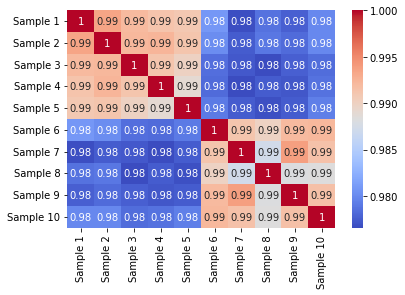

In [13]:
# Whole dataset
correlation_df = df.corr(method='pearson') 
correlation_df = df.corr() 
correlation_df.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2) 
sns.heatmap(correlation_df,cbar=True,annot=True,cmap='coolwarm') 
plt.show()
#correlation_df.savefig("correlation.png")
#plt.savefig('plots/correlation.png')
# plt.savefig('correlation.png')
# plt.close() 

/var/folders/_1/dc2yd0kn325bph09grgy33lr0000gn/T/ipykernel_98212/4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Sample 1'}>,
        <AxesSubplot:title={'center':'Sample 2'}>,
        <AxesSubplot:title={'center':'Sample 3'}>],
       [<AxesSubplot:title={'center':'Sample 4'}>,
        <AxesSubplot:title={'center':'Sample 5'}>,
        <AxesSubplot:title={'center':'Sample 6'}>],
       [<AxesSubplot:title={'center':'Sample 7'}>,
        <AxesSubplot:title={'center':'Sample 8'}>,
        <AxesSubplot:title={'center':'Sample 9'}>],
       [<AxesSubplot:title={'center':'Sample 10'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

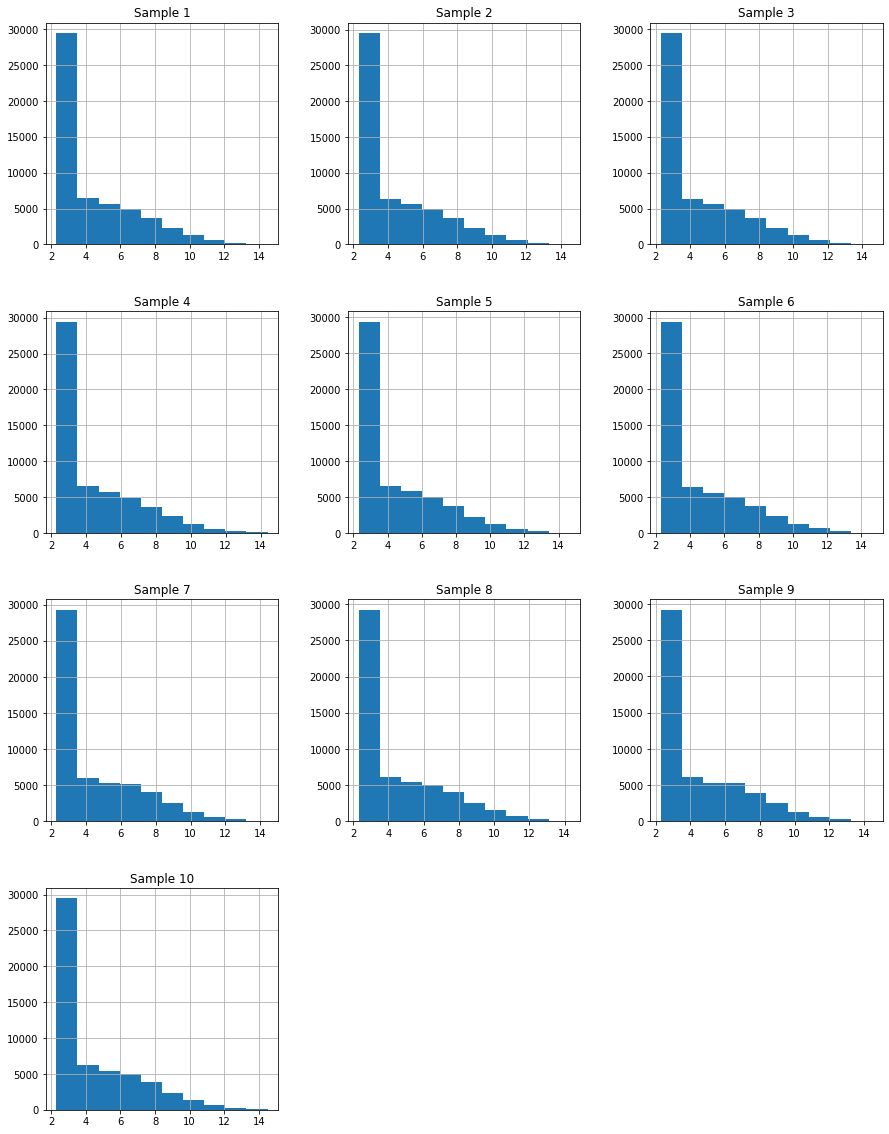

In [14]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Gene Name:  1007_PM_s_at


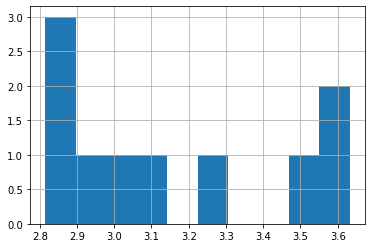

Gene Name:  1053_PM_at


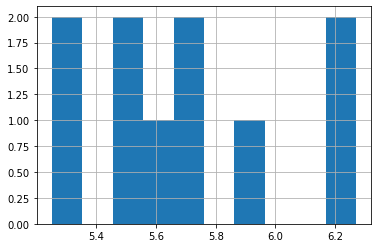

Gene Name:  117_PM_at


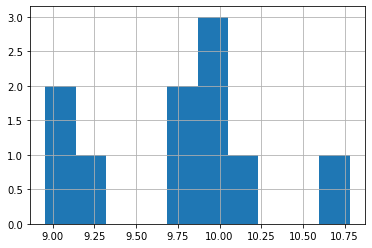

Gene Name:  121_PM_at


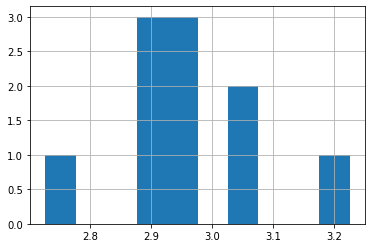

Gene Name:  1255_PM_g_at


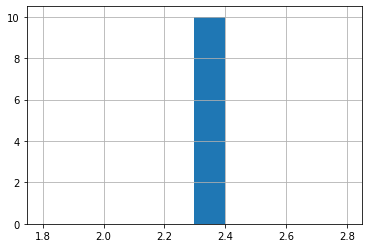

Gene Name:  1294_PM_at


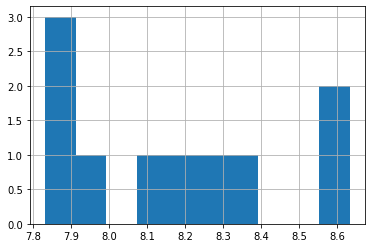

Gene Name:  1316_PM_at


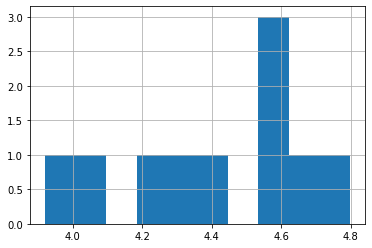

Gene Name:  1320_PM_at


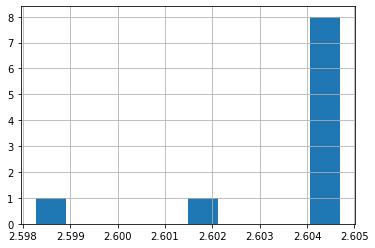

Gene Name:  1405_PM_i_at


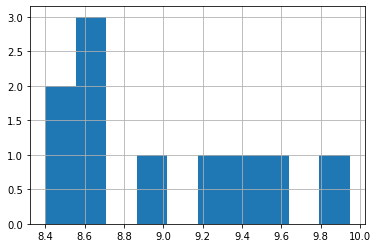

Gene Name:  1431_PM_at


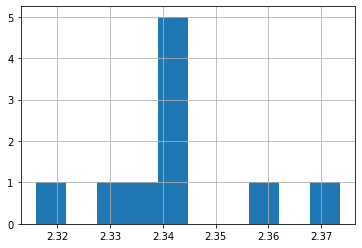

In [15]:
for i in df.T.columns: 
    print('Gene Name: ', df.T[i]['ID_REF'])
    df.T.drop(labels='ID_REF', axis=0)[i].hist() 
    plt.show() 
    print("================================================================")
    if i==9: 
        break 